<a href="https://colab.research.google.com/github/maynak-dev/customer-feedback-analyzer/blob/main/Customer_Feedback_Analyzer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pandas matplotlib seaborn nltk wordcloud

In [3]:
# Import essential Python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Import NLP tools
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Download VADER sentiment lexicon
nltk.download('vader_lexicon')

# Import Google Colab's file upload utility
from google.colab import files

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [8]:
import pandas as pd
import io

# The CSV file has an unusual format where each line, including the header and data,
# is enclosed in an outer set of quotes, and then text fields inside are also quoted.

with open("/content/drive/MyDrive/DataSets/sentiment-analysis.csv", 'r') as f:
    raw_lines = f.readlines()

processed_lines = []

# Process header: Remove the outer quotes from the first line
# Example: '"Text, Sentiment, ..."\n' becomes 'Text, Sentiment, ...'
processed_lines.append(raw_lines[0].strip().strip('"'))

# Process data lines: Remove the outer quotes from each data line
# Example: '"""I love this product!"", Positive, ..."\n' becomes '"I love this product!", Positive, ...'
for line in raw_lines[1:]:
    processed_lines.append(line.strip().strip('"'))

# Join the processed lines back into a single string for pandas to read
csv_string = '\n'.join(processed_lines)

# Use io.StringIO to read this cleaned string as a CSV. pandas will handle the inner quotes.
df = pd.read_csv(io.StringIO(csv_string), sep=',')

# Show first few rows to verify parsing
df.head(10)

,Text,Sentiment,Source,Date/Time,User ID,Location,Confidence Score
0,"I love this product!""""",Positive,Twitter,2023-06-15 09:23:14,@user123,New York,0.85
1,"The service was terrible.""""",Negative,Yelp Reviews,2023-06-15 11:45:32,user456,Los Angeles,0.65
2,"This movie is amazing!""""",Positive,IMDb,2023-06-15 14:10:22,moviefan789,London,0.92
3,I'm so disappointed with their customer suppor...,Negative,Online Forum,2023-06-15 17:35:11,forumuser1,Toronto,0.78
4,"Just had the best meal of my life!""""",Positive,TripAdvisor,2023-06-16 08:50:59,foodie22,Paris,0.88
5,"The quality of this product is subpar.""""",Negative,Amazon Reviews,2023-06-16 10:15:27,shopper123,San Francisco,0.72
6,I can't stop listening to this song. It's incr...,Positive,Spotify,2023-06-16 13:40:18,musiclover456,Berlin,0.91
7,"Their website is so user-friendly. Love it!""""",Positive,Website Testimonial,2023-06-16 16:05:36,testimonialuser1,Sydney,0.87
8,"I loved the movie! It was fantastic!""""",Positive,IMDb,2023-07-02 09:12:34,user123,New York,0.92
9,"The customer service was terrible.""""",Negative,Yelp Reviews,2023-07-02 10:45:21,user456,Los Angeles,0.65


In [9]:
# Drop missing rows (if any)
df.dropna(inplace=True)

# Convert feedback text to lowercase (adjust column name if needed)
# Assuming 'Text' is the intended feedback column
df['Text'] = df['Text'].str.lower()

# Remove any trailing double quotes that resulted from the unusual CSV parsing
df['Text'] = df['Text'].str.rstrip('"')

df.head()

,Text,Sentiment,Source,Date/Time,User ID,Location,Confidence Score
0,"i love this product!""""",Positive,Twitter,2023-06-15 09:23:14,@user123,New York,0.85
1,"the service was terrible.""""",Negative,Yelp Reviews,2023-06-15 11:45:32,user456,Los Angeles,0.65
2,"this movie is amazing!""""",Positive,IMDb,2023-06-15 14:10:22,moviefan789,London,0.92
3,i'm so disappointed with their customer suppor...,Negative,Online Forum,2023-06-15 17:35:11,forumuser1,Toronto,0.78
4,"just had the best meal of my life!""""",Positive,TripAdvisor,2023-06-16 08:50:59,foodie22,Paris,0.88


In [11]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

# Initialize sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Apply VADER to each feedback in the 'Text' column
df['Sentiment_Score'] = df['Text'].apply(lambda x: sia.polarity_scores(x)['compound'])

# Categorize based on score
df['Sentiment'] = df['Sentiment_Score'].apply(
    lambda x: 'Positive' if x > 0.05 else ('Negative' if x < -0.05 else 'Neutral')
)

df.head()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,Text,Sentiment,Source,Date/Time,User ID,Location,Confidence Score,Sentiment_Score,Sentiment
0,"i love this product!""""",Positive,Twitter,2023-06-15 09:23:14,@user123,New York,0.85,0.6696,Positive
1,"the service was terrible.""""",Negative,Yelp Reviews,2023-06-15 11:45:32,user456,Los Angeles,0.65,0.0000,Neutral
2,"this movie is amazing!""""",Positive,IMDb,2023-06-15 14:10:22,moviefan789,London,0.92,0.0000,Neutral
3,i'm so disappointed with their customer suppor...,Negative,Online Forum,2023-06-15 17:35:11,forumuser1,Toronto,0.78,-0.5256,Negative
4,"just had the best meal of my life!""""",Positive,TripAdvisor,2023-06-16 08:50:59,foodie22,Paris,0.88,0.6696,Positive


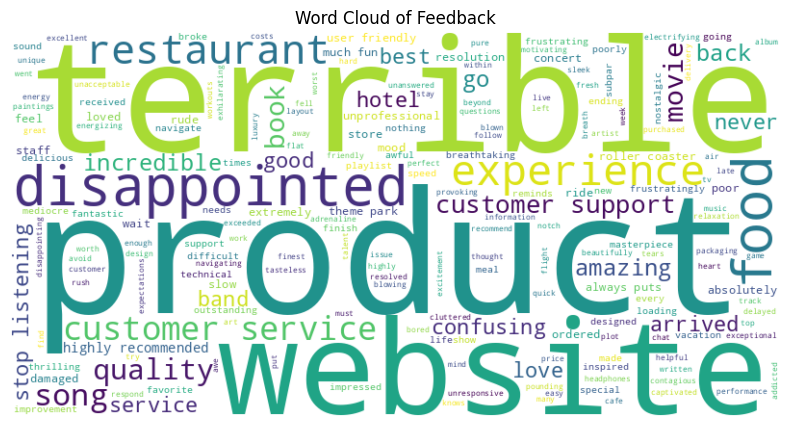

In [13]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Use the 'Text' column for word cloud generation after cleaning
all_text = ' '.join(df['Text'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Feedback")
plt.show()

In [14]:
df.to_csv("customer_feedback_results.csv", index=False)

from google.colab import files
files.download("customer_feedback_results.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [15]:
positive = df[df['Sentiment'] == 'Positive'].shape[0]
negative = df[df['Sentiment'] == 'Negative'].shape[0]
neutral = df[df['Sentiment'] == 'Neutral'].shape[0]

summary = f"""
Customer Feedback Analysis Report
----------------------------------
Total Feedbacks: {len(df)}
Positive: {positive}
Negative: {negative}
Neutral: {neutral}

Overall Sentiment: {'Positive' if positive > negative else 'Negative' if negative > positive else 'Neutral'}
"""

print(summary)

with open("Customer_Feedback_Report.txt", "w") as f:
    f.write(summary)

files.download("Customer_Feedback_Report.txt")



Customer Feedback Analysis Report
----------------------------------
Total Feedbacks: 96
Positive: 43
Negative: 33
Neutral: 20

Overall Sentiment: Positive



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>